### **Equipo 8**

- Diego Villegas Juárez     197902
- Yedam Axel Fortiz Vargas  119523
- Yusuri Arciga Reyes       190063

### **Proyecto 1**

EDA de Accidentes viales en la CDMX reportados por C5

Nuestras variables son las siguientes:

folio,
fecha de creación del reporte,
hora de creación del reporte,
día de la semana de creación del reporte,
fecha de cierre de reporte,
hora de cierre de reporte,
motivo del incidente dependiendo del tipo de emergencia,
alcaldía donde sucedió el incidente,
latitud y longitud del incidente,
código de cierre del incidente reportado,
clasificación del incidente,
origen del incidente por tipo,
alcaldía en que se dio resolución al incidente o emergencia

En la base de datos tenemos 1,383,138 registros y 18 variables: 

- folio
- fecha_creacion
- hora_creacion
- dia_semana
- codigo_cierre
- fecha_cierre
- año_cierre
- mes_cierre
- hora_cierre
- delegacion_inicio
- incidente_c4
- latitud
- longitud
- clas_con_f_alarma
- tipo_entrada
- delegacion_cierre
- geopoint
- mes
  
Tenemos datos de 2014-2020

    Data profiling:
     -  Tabla de data profiling para las columnas numéricas. Explica las 3 cosas más relevantes.
     -  Tabla de data profiling para las columnas categóricas. Explica las 3 cosas más relevantes.
        Tabla de data profiling para las columnas de fecha. Explica las 3 cosas más relevantes.
        Tabla de data profiling para las columnas geoespaciales. Explica las 3 cosas más relevantes.


   - Se identifica el número de registros con los que cuentan
   - Se identifica el periodo con el se cuentan los datos
        Saltos?
        Todo el periodo?
   - Se identifican las variables con las que contamos
   - Se identifican los faltantes de datos por variable (%)
    
    Las gráficas no son ambiguas
    Las gráficas no son "barrocas"
    Las gráficas tienen los nombres en los ejes
    Las etiquetas en los "ticks" de los ejes están con comas o con K, M, etc. de ser necesario. Por ejemplo: 100k para 100,000, o 100,000 (con coma incluido)
    Los nombres de los ejes incluyen unidades. Por ejemplo m^3
    Se identifican cosas "raras"
    Se ocupan las gráficas adecuadas
    Se habla en lenguaje de negocio, aún explicando cosas técnicas
    Se cuenta una historia coherente


In [25]:
import pandas as pd
import numpy as np
#import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
c5 = pd.read_csv('incidentes-viales-c5.csv')

In [3]:
c5.shape

(1383138, 18)

In [5]:
c5.dtypes

folio                 object
fecha_creacion        object
hora_creacion         object
dia_semana            object
codigo_cierre         object
fecha_cierre          object
año_cierre             int64
mes_cierre            object
hora_cierre           object
delegacion_inicio     object
incidente_c4          object
latitud              float64
longitud             float64
clas_con_f_alarma     object
tipo_entrada          object
delegacion_cierre     object
geopoint              object
mes                    int64
dtype: object

In [11]:
c5.columns

Index(['folio', 'fecha_creacion', 'hora_creacion', 'dia_semana',
       'codigo_cierre', 'fecha_cierre', 'año_cierre', 'mes_cierre',
       'hora_cierre', 'delegacion_inicio', 'incidente_c4', 'latitud',
       'longitud', 'clas_con_f_alarma', 'tipo_entrada', 'delegacion_cierre',
       'geopoint', 'mes'],
      dtype='object')

In [4]:
c5.nunique()

folio                1383138
fecha_creacion          2637
hora_creacion         105887
dia_semana                 7
codigo_cierre              5
fecha_cierre            2621
año_cierre                 7
mes_cierre                12
hora_cierre           106827
delegacion_inicio         16
incidente_c4              26
latitud                82501
longitud               78984
clas_con_f_alarma          4
tipo_entrada               9
delegacion_cierre         16
geopoint              134288
mes                       12
dtype: int64

In [14]:
c5.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
0,GA/160123/05714,23/01/2016,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1
1,AO/160123/05826,23/01/2016,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1
2,C4/160124/02187,24/01/2016,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1
3,C4/160124/05723,24/01/2016,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1
4,C4/160124/01334,24/01/2016,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,24/01/2016,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1


In [28]:
c5.dia_semana.unique()

['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']
Categories (7, object): ['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes']

In [29]:
c5.codigo_cierre.unique()

array(['(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada',
       '(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad',
       '(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente',
       '(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente',
       '(I) El incidente reportado es afirmativo y se añade información adicional al evento'],
      dtype=object)

In [30]:
c5.año_cierre.unique()

array([2016, 2017, 2018, 2019, 2015, 2014, 2020])

In [31]:
c5.mes_cierre.unique()

array(['Enero', 'Febrero', 'Marzo', 'Septiembre', 'Octubre', 'Mayo',
       'Junio', 'Abril', 'Agosto', 'Diciembre', 'Julio', 'Noviembre'],
      dtype=object)

In [32]:
c5.delegacion_inicio.unique()

['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN', 'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', ..., 'IZTACALCO', 'MILPA ALTA', 'ALVARO OBREGON', 'XOCHIMILCO', NaN]
Length: 17
Categories (16, object): ['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN', 'MAGDALENA CONTRERAS', ..., 'IZTACALCO', 'MILPA ALTA', 'ALVARO OBREGON', 'XOCHIMILCO']

In [33]:
c5.incidente_c4.unique()

array(['accidente-choque sin lesionados',
       'accidente-choque con lesionados',
       'lesionado-accidente automovilístico', 'accidente-volcadura',
       'lesionado-atropellado', 'accidente-otros',
       'accidente-persona atrapada / desbarrancada',
       'cadáver-accidente automovilístico', 'cadáver-atropellado',
       'accidente-motociclista', 'accidente-vehiculo desbarrancado',
       'accidente-choque con prensados', 'accidente-vehiculo atrapado',
       'accidente-ciclista', 'accidente-monopatín',
       'sismo-choque con lesionados',
       'accidente-vehículo atrapado-varado',
       'detención ciudadana-atropellado', 'accidente-ferroviario',
       'detención ciudadana-accidente automovilístico',
       'sismo-choque sin lesionados', 'sismo-persona atropellada',
       'Detención ciudadana-accidente automovilístico',
       'sismo-choque con prensados',
       'mi ciudad-calle-incidente de tránsito',
       'mi ciudad-taxi-incidente de tránsito'], dtype=object)

In [34]:
c5.clas_con_f_alarma.unique()

array(['EMERGENCIA', 'URGENCIAS MEDICAS', 'FALSA ALARMA', 'DELITO'],
      dtype=object)

In [35]:
c5.tipo_entrada.unique()

['BOTÓN DE AUXILIO', 'LLAMADA DEL 066', 'RADIO', 'CÁMARA', 'REDES', 'LLAMADA DEL 911', 'LLAMADA APP911', 'ZELLO', 'APLICATIVOS']
Categories (9, object): ['BOTÓN DE AUXILIO', 'LLAMADA DEL 066', 'RADIO', 'CÁMARA', ..., 'LLAMADA DEL 911', 'LLAMADA APP911', 'ZELLO', 'APLICATIVOS']

In [36]:
c5.delegacion_cierre.unique()

['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN', 'MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', ..., 'AZCAPOTZALCO', 'IZTACALCO', 'MILPA ALTA', 'XOCHIMILCO', NaN]
Length: 17
Categories (16, object): ['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN', 'MAGDALENA CONTRERAS', ..., 'AZCAPOTZALCO', 'IZTACALCO', 'MILPA ALTA', 'XOCHIMILCO']

In [37]:
c5.mes.unique()

array([ 1,  2,  3,  9, 10,  5,  6,  4,  8, 12,  7, 11])

Convertir al tipo correcto de variable

In [7]:
c5['fecha_creacion'] = pd.to_datetime(c5['fecha_creacion'])
#c5['hora_creacion'] = pd.to_datetime(c5['hora_creacion'])
c5['dia_semana'] = c5.dia_semana.astype('category')
c5['codigo_cierre'] = c5.codigo_cierre.astype('category')
c5['fecha_cierre'] = pd.to_datetime(c5['fecha_cierre'])
c5['mes_cierre'] = c5.mes_cierre.astype('category')
#c5['hora_cierre'] = pd.to_datetime(c5['hora_cierre'])
c5['delegacion_inicio'] = c5.delegacion_inicio.astype('category')
c5['clas_con_f_alarma'] = c5.clas_con_f_alarma.astype('category')
c5['tipo_entrada'] = c5.tipo_entrada.astype('category')
c5['delegacion_cierre'] = c5.delegacion_cierre.astype('category')
#eliminar geopoint
c5['mes'] = c5.mes.astype('category')

In [4]:
c5.dtypes

folio                        object
fecha_creacion       datetime64[ns]
hora_creacion                object
dia_semana                 category
codigo_cierre              category
fecha_cierre         datetime64[ns]
año_cierre                    int64
mes_cierre                 category
hora_cierre                  object
delegacion_inicio          category
incidente_c4                 object
latitud                     float64
longitud                    float64
clas_con_f_alarma          category
tipo_entrada               category
delegacion_cierre          category
geopoint                     object
mes                        category
dtype: object

In [45]:
c5.describe()

,año_cierre,latitud,longitud
count,1.383138e+06,1.382695e+06,1.382703e+06
mean,2.017023e+03,1.938391e+01,-9.914359e+01
std,1.869989e+00,2.666382e-01,2.399677e+00
min,2.014000e+03,1.909402e+01,-9.917640e+02
25%,2.015000e+03,1.933685e+01,-9.917930e+01
50%,2.017000e+03,1.938408e+01,-9.914023e+01
75%,2.019000e+03,1.943496e+01,-9.909600e+01
max,2.020000e+03,1.953030e+02,-9.894537e+01


### 2.1 Data Profiling

In [8]:
#variables numéricas
nc5 = c5.select_dtypes(include='number').columns.values
print('Son ' + str(nc5.shape[0]) + ' variables numericas' , nc5)

Son 3 variables numericas ['año_cierre' 'latitud' 'longitud']


In [9]:
#variables fecha y hora
dc5 = c5.select_dtypes(include='datetime').columns.values
print('Son ' + str(dc5.shape[0]) + ' variables de fecha' , dc5)

Son 2 variables de fecha ['fecha_creacion' 'fecha_cierre']


In [10]:
#variables categóricas
cc5 = c5.select_dtypes(include='category').columns.values
print('Son ' + str(cc5.shape[0]) + ' variables categóricas' , cc5)

Son 8 variables categóricas ['dia_semana' 'codigo_cierre' 'mes_cierre' 'delegacion_inicio'
 'clas_con_f_alarma' 'tipo_entrada' 'delegacion_cierre' 'mes']


In [11]:
#variables string
sc5 = c5.select_dtypes(include='object').columns.values
print('Son ' + str(sc5.shape[0]) + ' variables cadena' , sc5)

Son 5 variables cadena ['folio' 'hora_creacion' 'hora_cierre' 'incidente_c4' 'geopoint']


In [12]:
# Validar que estén todas las variables clasificadas por tipo
if (sum([len(nc5), len(cc5), 
      len(dc5), len(sc5)]) == c5.shape[1]): 
    print('ok')
else:
    print('columns missing')

ok


In [13]:
def get_repeated_values(df, col, top):
    top_5 = df.groupby([col])[col]\
                    .count()\
                    .sort_values(ascending = False)\
                    .head(3)
    indexes_top_5 = top_5.index
    
    if ((top == 1) and (len(indexes_top_5) > 0)):
        return indexes_top_5[0]
    elif ((top == 2) and (len(indexes_top_5) > 1)):
        return indexes_top_5[1]
    elif ((top == 3) and (len(indexes_top_5) > 2)):
        return indexes_top_5[2]
    else: 
        return 'undefined'

Numéricas

In [26]:
def numeric_profiling(df, col):
    """
    Profiling for numeric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'max': df[col].max(),
                     'min': df[col].min(),
                     'mean': df[col].mean(),
                     'stdv': df[col].std(),
                     '25%': df[col].quantile(.25),
                     'median': df[col].median(),
                     '75%': df[col].quantile(.75),
                     'kurtosis': df[col].kurt(),
                     'skewness': df[col].skew(),
                     'uniques': df[col].nunique(),
                     'prop_missings': df[col].isna().sum()/df.shape[0]*100,
                     'num_na': df[col].isna().sum(),
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    
    return profiling

In [27]:
profiling_dict = {}

numeric_profiling_output = {elem: numeric_profiling(c5, elem)\
                            for elem in nc5}

In [28]:
df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,año_cierre,latitud,longitud
0,max,2020.000000,195.303000,-98.945370
1,min,2014.000000,19.094020,-991.764000
2,mean,2017.022848,19.383909,-99.143590
3,stdv,1.869989,0.266638,2.399677
4,25%,2015.000000,19.336850,-99.179300
5,median,2017.000000,19.384080,-99.140230
6,75%,2019.000000,19.434960,-99.096000
7,kurtosis,-1.118592,400835.233813,138084.253218
8,skewness,-0.103726,611.376322,-371.476884
9,uniques,7.000000,82501.000000,78984.000000


Categóricas

In [29]:
def category_profiling(df, col):
    """
    Profiling for categoric columns. 
    
    :param: column to analyze
    :return: dictionary
    """
    profiling = {}

    profiling.update({'mode': df[col].mode().values,
                     'num_categories': df[col].nunique(),
                     'categories': df[col].unique(),
                     'uniques': df[col].nunique(),
                     'prop_missings': df[col].isna().sum()/df[col].size*100,
                     'num_na': df[col].isna().sum(),
                     'top1_repeated': get_repeated_values(df, col, 1),
                     'top2_repeated': get_repeated_values(df, col, 2),
                     'top3_repeated': get_repeated_values(df, col, 3)})
    
    return profiling

In [30]:
category_profiling_output = {elem: category_profiling(c5, elem)\
                             for elem in cc5}

In [31]:
category_profiling_output
df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,dia_semana,codigo_cierre,mes_cierre,delegacion_inicio,clas_con_f_alarma,tipo_entrada,delegacion_cierre,mes
0,mode,"['Viernes'] Categories (7, object): ['Domingo'...",['(A) La unidad de atención a emergencias fue ...,"['Octubre'] Categories (12, object): ['Abril',...","['IZTAPALAPA'] Categories (16, object): ['ALVA...","['EMERGENCIA'] Categories (4, object): ['DELIT...","['LLAMADA DEL 911'] Categories (9, object): ['...","['IZTAPALAPA'] Categories (16, object): ['ALVA...","[10] Categories (12, int64): [1, 2, 3, 4, ...,..."
1,num_categories,7,5,12,16,4,9,16,12
2,categories,"['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miér...",['(A) La unidad de atención a emergencias fue ...,"['Enero', 'Febrero', 'Marzo', 'Septiembre', 'O...","['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN...","['EMERGENCIA', 'URGENCIAS MEDICAS', 'FALSA ALA...","['BOTÓN DE AUXILIO', 'LLAMADA DEL 066', 'RADIO...","['VENUSTIANO CARRANZA', 'CUAJIMALPA', 'TLALPAN...","[1, 2, 3, 9, 10, ..., 4, 8, 12, 7, 11] Length:..."
3,uniques,7,5,12,16,4,9,16,12
4,prop_missings,0,0,0,0.0114233,0,0,0.0101219,0
5,num_na,0,0,0,158,0,0,140,0
6,top1_repeated,Viernes,(A) La unidad de atención a emergencias fue de...,Octubre,IZTAPALAPA,EMERGENCIA,LLAMADA DEL 911,IZTAPALAPA,10
7,top2_repeated,Sábado,(D) El incidente reportado se registró en dos ...,Agosto,GUSTAVO A. MADERO,URGENCIAS MEDICAS,LLAMADA DEL 066,GUSTAVO A. MADERO,8
8,top3_repeated,Jueves,(N) La unidad de atención a emergencias fue de...,Septiembre,CUAUHTEMOC,FALSA ALARMA,BOTÓN DE AUXILIO,CUAUHTEMOC,9


In [32]:
# Número de observaciones por categoría y proporción de observaciones por categoría. 

def num_prop(df,column_data):
    # Número de observaciones por categoría
    num=pd.value_counts(df[column_data]) 
    # Proporción de observaciones por categoría
    prop=100 * df[column_data].value_counts() / len(df[column_data])
    # Unión de columnas en una y renombramiento
    columnas_num_prop = round(pd.concat([num, prop], 
                                        keys=['num_obs_cat', 'prop_obs_cat'],
                                        axis=1),2)
    
    return columnas_num_prop

In [33]:
num_prop(c5,'mes')

,num_obs_cat,prop_obs_cat
10,133641,9.66
8,121123,8.76
9,120581,8.72
3,120335,8.70
12,117616,8.50
2,115988,8.39
11,115055,8.32
6,111782,8.08
7,109880,7.94
5,108590,7.85


In [34]:
num_prop(c5,'delegacion_inicio')

,num_obs_cat,prop_obs_cat
IZTAPALAPA,223687,16.17
GUSTAVO A. MADERO,144620,10.46
CUAUHTEMOC,141391,10.22
MIGUEL HIDALGO,115864,8.38
COYOACAN,110146,7.96
BENITO JUAREZ,104322,7.54
ALVARO OBREGON,102071,7.38
VENUSTIANO CARRANZA,94393,6.82
TLALPAN,87339,6.31
AZCAPOTZALCO,60823,4.40


In [35]:
c5.groupby(['delegacion_inicio']).count()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes
delegacion_inicio,,,,,,,,,,,,,,,,,
ALVARO OBREGON,102071,102071,102071,102071,102071,102071,102071,102071,102071,102071,102049,102049,102071,102071,102071,102049,102071
AZCAPOTZALCO,60823,60823,60823,60823,60823,60823,60823,60823,60823,60823,60808,60811,60823,60823,60823,60808,60823
BENITO JUAREZ,104322,104322,104322,104322,104322,104322,104322,104322,104322,104322,104302,104301,104322,104322,104322,104301,104322
COYOACAN,110146,110146,110146,110146,110146,110146,110146,110146,110146,110146,110119,110119,110146,110146,110146,110119,110146
CUAJIMALPA,26714,26714,26714,26714,26714,26714,26714,26714,26714,26714,26707,26707,26714,26714,26714,26707,26714
CUAUHTEMOC,141391,141391,141391,141391,141391,141391,141391,141391,141391,141391,141322,141326,141391,141391,141391,141322,141391
GUSTAVO A. MADERO,144620,144620,144620,144620,144620,144620,144620,144620,144620,144620,144576,144575,144620,144620,144620,144575,144620
IZTACALCO,58567,58567,58567,58567,58567,58567,58567,58567,58567,58567,58554,58555,58567,58567,58567,58554,58567
IZTAPALAPA,223687,223687,223687,223687,223687,223687,223687,223687,223687,223687,223603,223604,223687,223687,223687,223602,223687


In [36]:
geo = c5.geopoint.str.split(",", n=1, expand = True)
geo

,0,1
0,19.422113,-99.084643
1,19.35832,-99.297641
2,19.21707,-99.21907008
3,19.32057999,-99.24100992
4,19.45289997,-99.21587004
...,...,...
1383133,19.48631004,-99.11811996
1383134,19.427274,-99.115814
1383135,19.46718,-99.17525016
1383136,19.42728003,-99.09686016




Tabla de data profiling para las columnas numéricas. Explica las 3 cosas más relevantes.

Tabla de data profiling para las columnas categóricas. Explica las 3 cosas más relevantes.


#Las variables año y mes de cierre corresponden a la informacion de fecha de cierre?



Tabla de data profiling para las columnas de fecha. Explica las 3 cosas más relevantes.


#Al leer la data, los datos se transforman correctamente o tenemos alguna fecha irregular?
#Cual es el tiempo que tardan en cerrar un incidente?
#Que porcentaje de los incidentes se reportan y cierran en el mismo año?



Tabla de data profiling para las columnas geoespaciales. Explica las 3 cosas más relevantes.

#Latitud & Altitud es igual a GeoPoint?

### GEDA

In [37]:
# Crear variable de incidentes_reales
row_indexes=c5[c5['codigo_cierre']=='(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada'].index
c5.loc[row_indexes,'incidente_real']="1"
c5['incidente_real'] = c5['incidente_real'].replace(np.nan, '-1')

In [38]:
# Crear variable de incidentes_reales_aux para uso del mapa
row_indexes_aux=c5[c5['codigo_cierre']=='(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada'].index
c5.loc[row_indexes_aux,'incidente_real_aux']='red'
c5['incidente_real_aux'] = c5['incidente_real_aux'].replace(np.nan, 'blue')

In [39]:
c5['fecha_creacion']

0         2016-01-23
1         2016-01-23
2         2016-01-24
3         2016-01-24
4         2016-01-24
             ...    
1383133   2020-10-22
1383134   2020-10-22
1383135   2020-10-22
1383136   2020-10-22
1383137   2020-10-22
Name: fecha_creacion, Length: 1383138, dtype: datetime64[ns]

In [40]:
c5.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,incidente_real,incidente_real_aux
0,GA/160123/05714,2016-01-23,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1,1,red
1,AO/160123/05826,2016-01-23,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1,1,red
2,C4/160124/02187,2016-01-24,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,-1,blue
3,C4/160124/05723,2016-01-24,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,-1,blue
4,C4/160124/01334,2016-01-24,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1,1,red


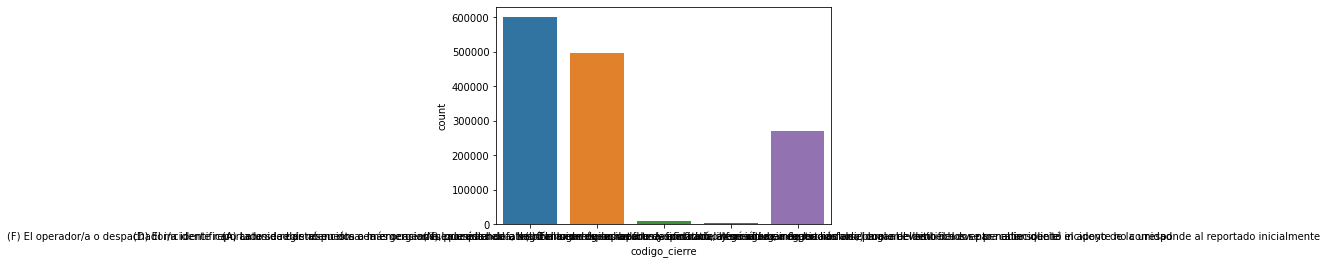

In [41]:
plt1 = sns.countplot(x="codigo_cierre",data=c5)
#ticks = plt1.axes[0][0].get_xticks()
#ylabels = ['$' + '{:,.0f}'.format(y) for y in ticks]
#plt1.axes[0][0]#.get_xticks()


<AxesSubplot:xlabel='count', ylabel='codigo_cierre'>

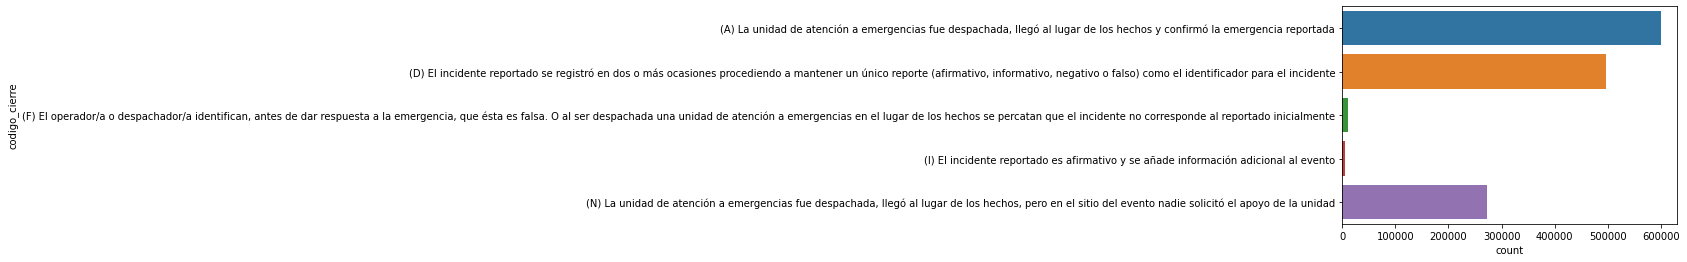

In [42]:
sns.countplot(y="codigo_cierre",data=c5)

<AxesSubplot:xlabel='año_cierre', ylabel='count'>

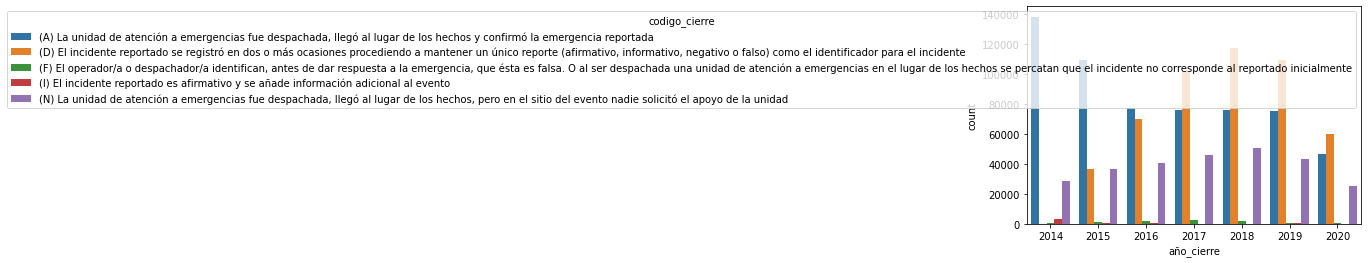

In [43]:
sns.countplot(x="año_cierre",hue='codigo_cierre',data=c5)

<AxesSubplot:xlabel='incidente_real', ylabel='count'>

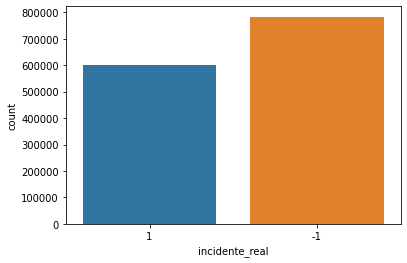

In [44]:
sns.countplot(x="incidente_real",data=c5)

<AxesSubplot:xlabel='año_cierre', ylabel='count'>

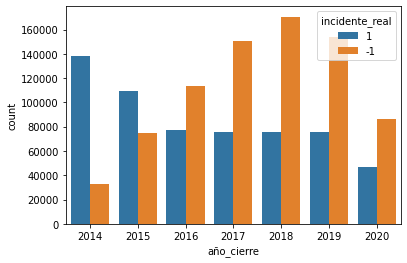

In [45]:
sns.countplot(x="año_cierre",hue='incidente_real',data=c5)

In [46]:
#pd.crosstab(c5['incidente_c4'],c5['incidente_real'],dropna=False,normalize='index')

<AxesSubplot:xlabel='incidente_real', ylabel='incidente_c4'>

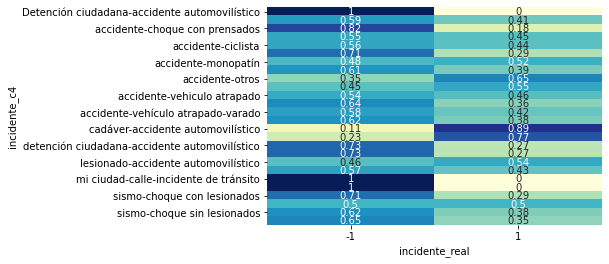

In [47]:
sns.heatmap(pd.crosstab(c5['incidente_c4'],c5['incidente_real'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

<AxesSubplot:xlabel='incidente_real', ylabel='tipo_entrada'>

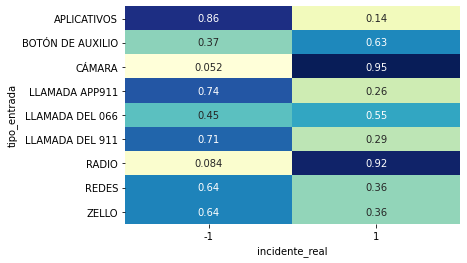

In [48]:
sns.heatmap(pd.crosstab(c5['tipo_entrada'],c5['incidente_real'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

#### Comportamiento por colonia

<AxesSubplot:xlabel='delegacion_cierre', ylabel='delegacion_inicio'>

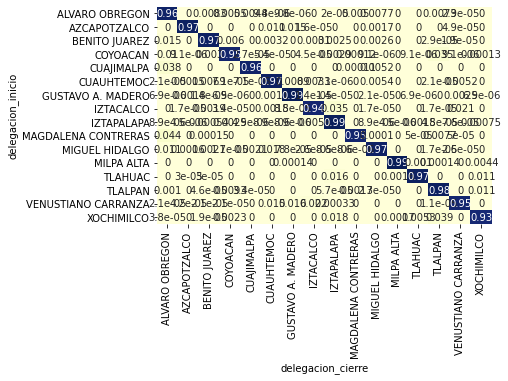

In [49]:
sns.heatmap(pd.crosstab(c5['delegacion_inicio'],c5['delegacion_cierre'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

<AxesSubplot:xlabel='count', ylabel='delegacion_inicio'>

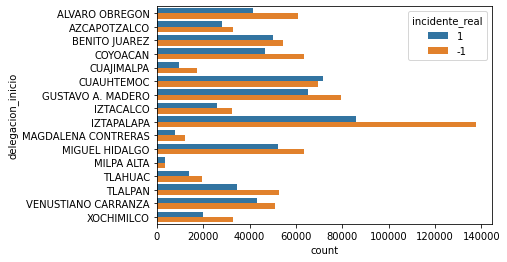

In [50]:
sns.countplot(y='delegacion_inicio',hue="incidente_real",data=c5)

<AxesSubplot:xlabel='incidente_real', ylabel='delegacion_inicio'>

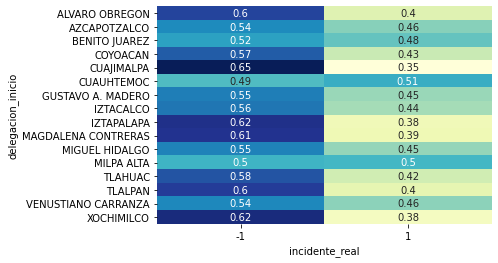

In [51]:
sns.heatmap(pd.crosstab(c5['delegacion_inicio'],c5['incidente_real'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

analisis por dia de la semana

<AxesSubplot:xlabel='dia_semana', ylabel='count'>

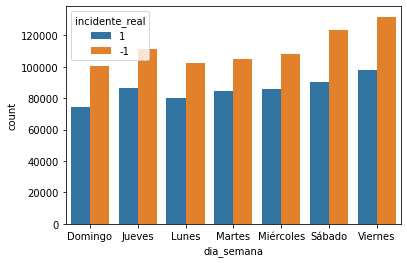

In [53]:
sns.countplot(x="dia_semana",hue='incidente_real',data=c5)

<AxesSubplot:xlabel='incidente_real', ylabel='dia_semana'>

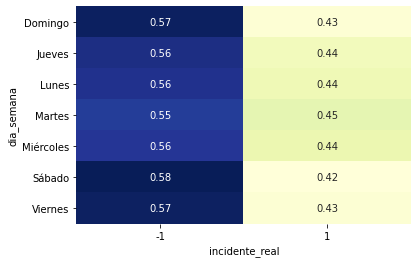

In [55]:
sns.heatmap(pd.crosstab(c5['dia_semana'],c5['incidente_real'],dropna=False,normalize='index'),
            cmap="YlGnBu", 
            annot=True, cbar=False)

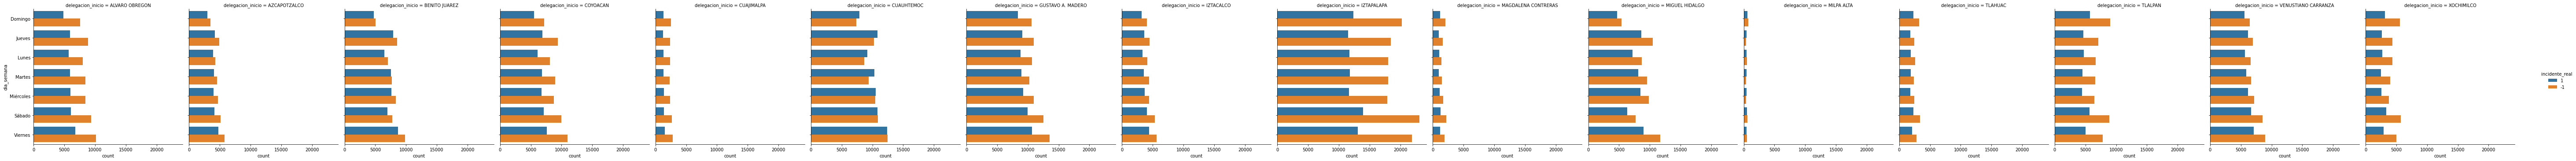

In [56]:
sns.catplot(y='dia_semana',hue='incidente_real',col='delegacion_inicio',
            data=c5,kind='count')

agregar mapa

analisis por hora del dia
agregar gráfica de tiempo en que tardan en responder

**falta convertir adecuadamente las columnas de fecha**

agregar titulos
modificar unidades en que se presentan

In [57]:


##consu_alca_tot = pd.DataFrame(c5,
##                      columns=['delegacion_inicio',
##                              'incidente_c4',
##                               'clas_con_f_alarma',
##                               'tipo_entrada'])\
##.groupby(['delegacion_inicio'], as_index=False).sum()#\
#.sort_values(by=['consumo_prom'], ascending=False)\
#.melt(id_vars='delegacion_inicio')



In [58]:
##sns.set(style='whitegrid',rc={'figure.figsize':(8,11)},palette='crest')
##plt1 = sns.barplot(x="value", y="alcaldia", 
##            data=consu_alca_tot, hue = 'variable')
##plt1.set(xlabel='Consumo Agua m3')
##plt.show()


In [59]:
##c5.dtypes

In [60]:
#Mapa

In [61]:
c5.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint,mes,incidente_real,incidente_real_aux
0,GA/160123/05714,2016-01-23,22:35:04,Sábado,(A) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,00:21:08,VENUSTIANO CARRANZA,accidente-choque sin lesionados,19.422113,-99.084643,EMERGENCIA,BOTÓN DE AUXILIO,VENUSTIANO CARRANZA,"19.422113,-99.084643",1,1,red
1,AO/160123/05826,2016-01-23,22:50:49,Sábado,(A) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,04:40:37,CUAJIMALPA,accidente-choque con lesionados,19.358320,-99.297641,URGENCIAS MEDICAS,BOTÓN DE AUXILIO,CUAJIMALPA,"19.35832,-99.297641",1,1,red
2,C4/160124/02187,2016-01-24,09:40:11,Domingo,(N) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,11:13:03,TLALPAN,accidente-choque sin lesionados,19.217070,-99.219070,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.21707,-99.21907008",1,-1,blue
3,C4/160124/05723,2016-01-24,22:40:57,Domingo,(N) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,22:55:51,MAGDALENA CONTRERAS,accidente-choque sin lesionados,19.320580,-99.241010,EMERGENCIA,LLAMADA DEL 066,MAGDALENA CONTRERAS,"19.32057999,-99.24100992",1,-1,blue
4,C4/160124/01334,2016-01-24,04:25:15,Domingo,(A) La unidad de atención a emergencias fue de...,2016-01-24,2016,Enero,05:03:59,MIGUEL HIDALGO,accidente-choque sin lesionados,19.452900,-99.215870,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.45289997,-99.21587004",1,1,red


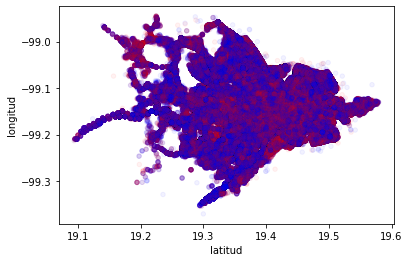

In [62]:
c5.plot(kind="scatter",x='latitud',y='longitud',c='incidente_real_aux',
        alpha=0.05)
plt.show()

In [63]:
##data=c5.copy()

In [64]:
##data.groupby('delegacion_inicio')['folio'].nunique()
##data_map=data[data.delegacion_inicio=="MIGUEL HIDALGO"]

In [65]:
##fig = px.scatter_mapbox(data_map, lat="latitud", lon="longitud",color="incidente_real",color_continuous_scale=px.colors.cyclical.IceFire)
##                        , size_max=15, zoom=3)
##fig.update_layout(mapbox_style="open-street-map")
##fig.show()

In [67]:
##data=data.assign(count=1)

In [68]:
##pivot_1=data[['count','dia_semana','clas_con_f_alarma']].groupby(['clas_con_f_alarma','dia_semana']).sum().reset_index()

In [69]:
##sns.barplot(x="count", y="clas_con_f_alarma", data=pivot_1)

### 3 Transformación de variables

### 4 Imputación de variables

#Variables a imputar

latitud

longitud

delegacion_inicio

delegacion_cierre